<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/sarcasm_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2020-04-03 18:49:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-04-03 18:49:47 (120 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
import json

with open('/tmp/sarcasm.json','r') as f:
  datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV'
training_size = 20000

In [0]:
training_sentences = sentences[:training_size]
training_labels = labels[:training_size]
testing_sentences = sentences[training_size:]
testing_label = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
n_epochs = 30
import numpy as np
training_labels = np.array(training_labels)
testing_labels = np.array(testing_label)
history = model.fit(training_padded,training_labels,epochs=n_epochs,validation_data=(testing_padded,testing_labels),verbose=1)

Epoch 1/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5225 - accuracy: 0.7353 - val_loss: 0.4120 - val_accuracy: 0.8125
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8281 - val_loss: 0.3989 - val_accuracy: 0.8141
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8350 - val_loss: 0.4010 - val_accuracy: 0.8146
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8356 - val_loss: 0.4038 - val_accuracy: 0.8103
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8375 - val_loss: 0.4043 - val_accuracy: 0.8138
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8383 - val_loss: 0.4048 - val_accuracy: 0.8144
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8389 - val_loss: 0.4058 - val_accuracy: 0.8132
Epoch 

In [0]:
import matplotlib.pyplot as plt

def plotter(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

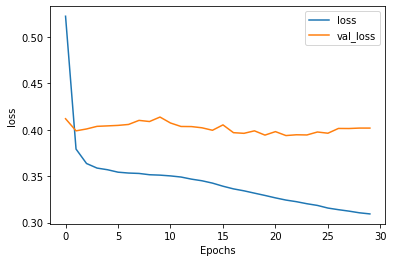

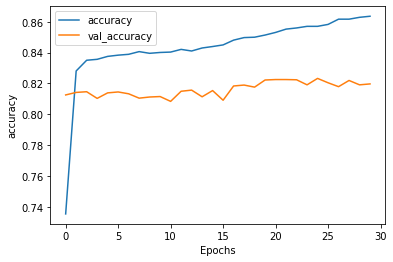

In [15]:
plotter(history,'loss')
plotter(history,'accuracy')